In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from scipy.stats import zscore
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV
from scipy import stats
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.decomposition import PCA

In [3]:
import nltk
import sklearn
print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.6.5.
The scikit-learn version is 0.24.2.


# Problem 1 - Bank Marketing Data Analysis

In [4]:
ds=pd.read_csv('C:/Users/dheepig/Desktop/Dheepika/Great Lakes/Session 4- Data Mining/Project/Datasets/bank_marketing_part1_Data.csv')
ds.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


# Question 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
row, col = ds.shape
print("There are total {}".format(row), "rows and {}".format(col), "columns in the dataset")

There are total 210 rows and 7 columns in the dataset


In [7]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [8]:
ds.isnull().any()

spending                        False
advance_payments                False
probability_of_full_payment     False
current_balance                 False
credit_limit                    False
min_payment_amt                 False
max_spent_in_single_shopping    False
dtype: bool

In [9]:
ds.duplicated().sum()

0

In [10]:
ds.skew(axis=0,skipna=True)

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

In [11]:
corr1=ds.corr()
round(corr1,2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.00,0.99,0.61,0.95,0.97,-0.23,0.86
advance_payments,0.99,1.00,0.53,0.97,0.94,-0.22,0.89
probability_of_full_payment,0.61,0.53,1.00,0.37,0.76,-0.33,0.23
current_balance,0.95,0.97,0.37,1.00,0.86,-0.17,0.93
credit_limit,0.97,0.94,0.76,0.86,1.00,-0.26,0.75
min_payment_amt,-0.23,-0.22,-0.33,-0.17,-0.26,1.00,-0.01
max_spent_in_single_shopping,0.86,0.89,0.23,0.93,0.75,-0.01,1.00


<AxesSubplot:>

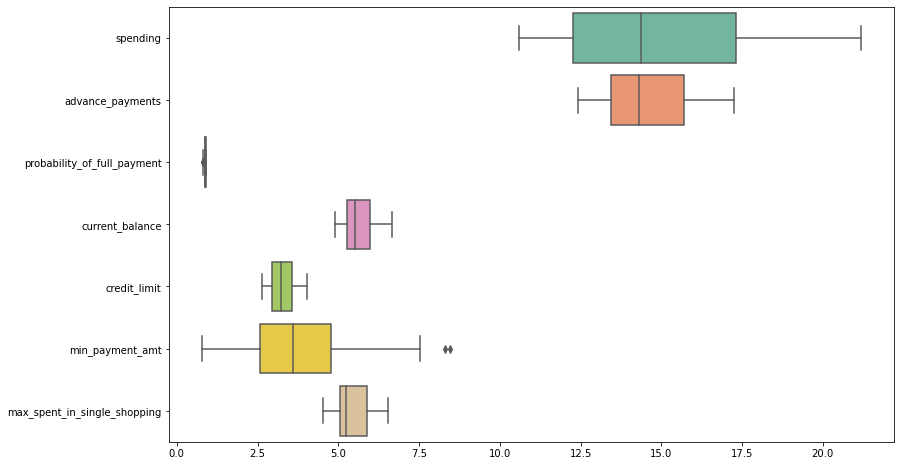

In [12]:
plt.figure(figsize=(13,8))
sns.boxplot(data=ds,orient="h", palette="Set2")

In [23]:
def detect_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [24]:
lr,ur=detect_outlier(ds['spending'])
lr1,ur1=detect_outlier(ds['advance_payments'])
lr2,ur2=detect_outlier(ds['probability_of_full_payment'])
lr3,ur3=detect_outlier(ds['current_balance'])
lr4,ur4=detect_outlier(ds['credit_limit'])
lr5,ur5=detect_outlier(ds['min_payment_amt'])
lr6,ur6=detect_outlier(ds['max_spent_in_single_shopping'])
print("lower range",lr,"upper range",ur)
print("lower range",lr1,"upper range",ur1)
print("lower range",lr2,"upper range",ur2)
print("lower range",lr3,"upper range",ur3)
print("lower range",lr4,"upper range",ur4)
print("lower range",lr5,"upper range",ur5)
print("lower range",lr6,"upper range",ur6)

lower range 4.717499999999999 upper range 24.8575
lower range 10.052499999999998 upper range 19.1125
lower range 0.8105875 upper range 0.9340875
lower range 4.186 upper range 7.056000000000001
lower range 2.017375 upper range 4.488375
lower range -0.7493749999999992 upper range 8.079625
lower range 3.797 upper range 7.125


In [19]:
((0.8105875+0.9340875)/7)*100

422.50000000000006

In [12]:
ds[['spending','advance_payments','probability_of_full_payment']].describe()

,spending,advance_payments,probability_of_full_payment
count,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999
std,2.909699,1.305959,0.023629
min,10.590000,12.410000,0.808100
25%,12.270000,13.450000,0.856900
50%,14.355000,14.320000,0.873450
75%,17.305000,15.715000,0.887775
max,21.180000,17.250000,0.918300


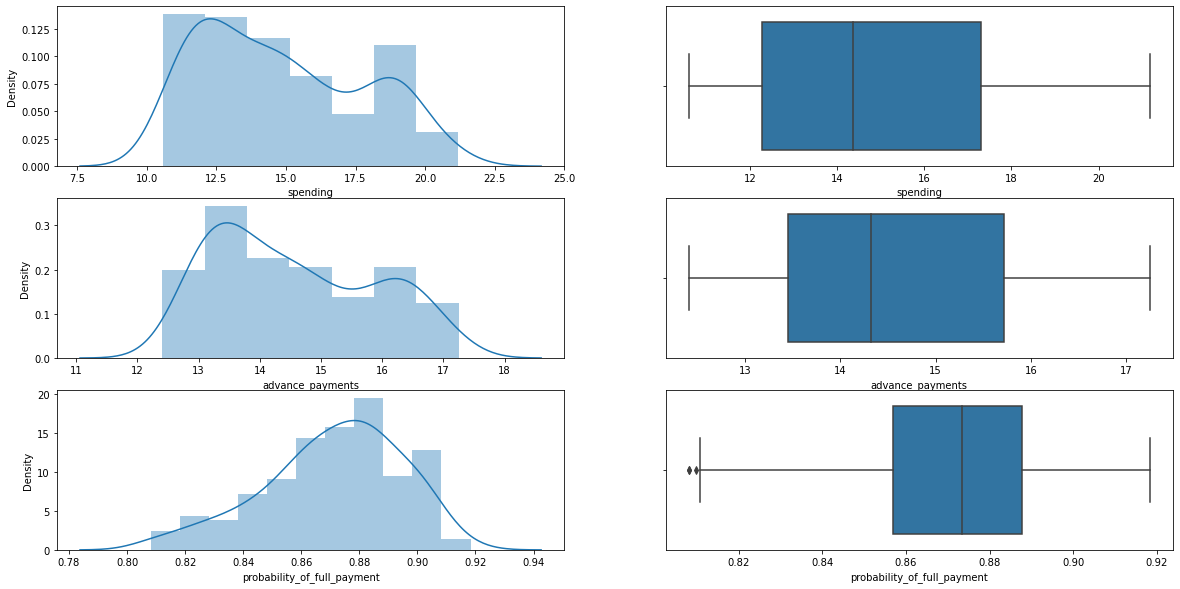

In [13]:
fig,axes=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20,10)
sns.distplot(ds['spending'],kde=True,ax=axes[0][0])
sns.boxplot(x='spending',data=ds,ax=axes[0][1])
sns.distplot(ds['advance_payments'],kde=True,ax=axes[1][0])
sns.boxplot(x='advance_payments',data=ds,ax=axes[1][1])
sns.distplot(ds['probability_of_full_payment'],kde=True,ax=axes[2][0])
sns.boxplot(x='probability_of_full_payment',data=ds,ax=axes[2][1])
plt.show()

In [14]:
ds[['current_balance','credit_limit']].describe()

,current_balance,credit_limit
count,210.000000,210.000000
mean,5.628533,3.258605
std,0.443063,0.377714
min,4.899000,2.630000
25%,5.262250,2.944000
50%,5.523500,3.237000
75%,5.979750,3.561750
max,6.675000,4.033000


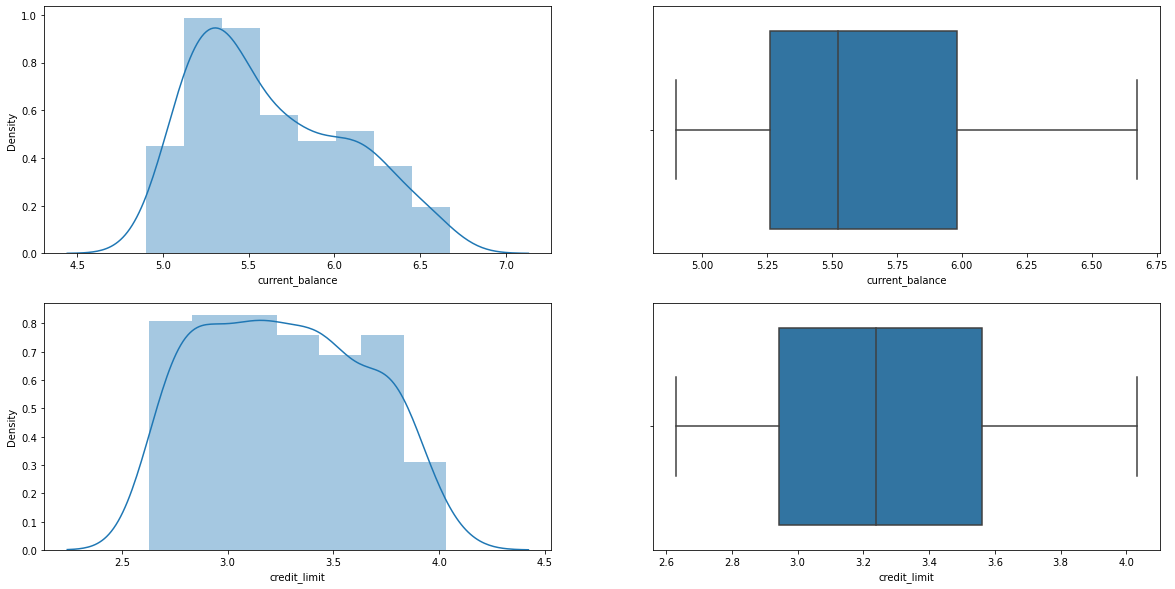

In [15]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,10)
sns.distplot(ds['current_balance'],kde=True,ax=axes[0][0])
sns.boxplot(x='current_balance',data=ds,ax=axes[0][1])
sns.distplot(ds['credit_limit'],kde=True,ax=axes[1][0])
sns.boxplot(x='credit_limit',data=ds,ax=axes[1][1])
plt.show()

In [16]:
ds[['min_payment_amt','max_spent_in_single_shopping']].describe()

,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000
mean,3.700201,5.408071
std,1.503557,0.491480
min,0.765100,4.519000
25%,2.561500,5.045000
50%,3.599000,5.223000
75%,4.768750,5.877000
max,8.456000,6.550000


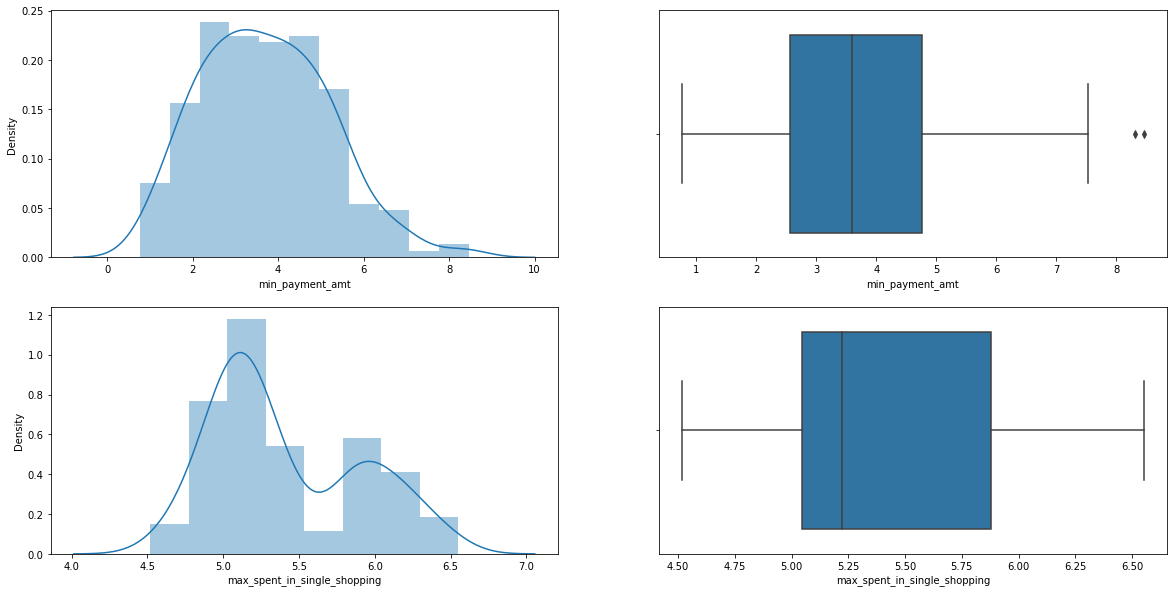

In [17]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,10)
sns.distplot(ds['min_payment_amt'],kde=True,ax=axes[0][0])
sns.boxplot(x='min_payment_amt',data=ds,ax=axes[0][1])
sns.distplot(ds['max_spent_in_single_shopping'],kde=True,ax=axes[1][0])
sns.boxplot(x='max_spent_in_single_shopping',data=ds,ax=axes[1][1])
plt.show()

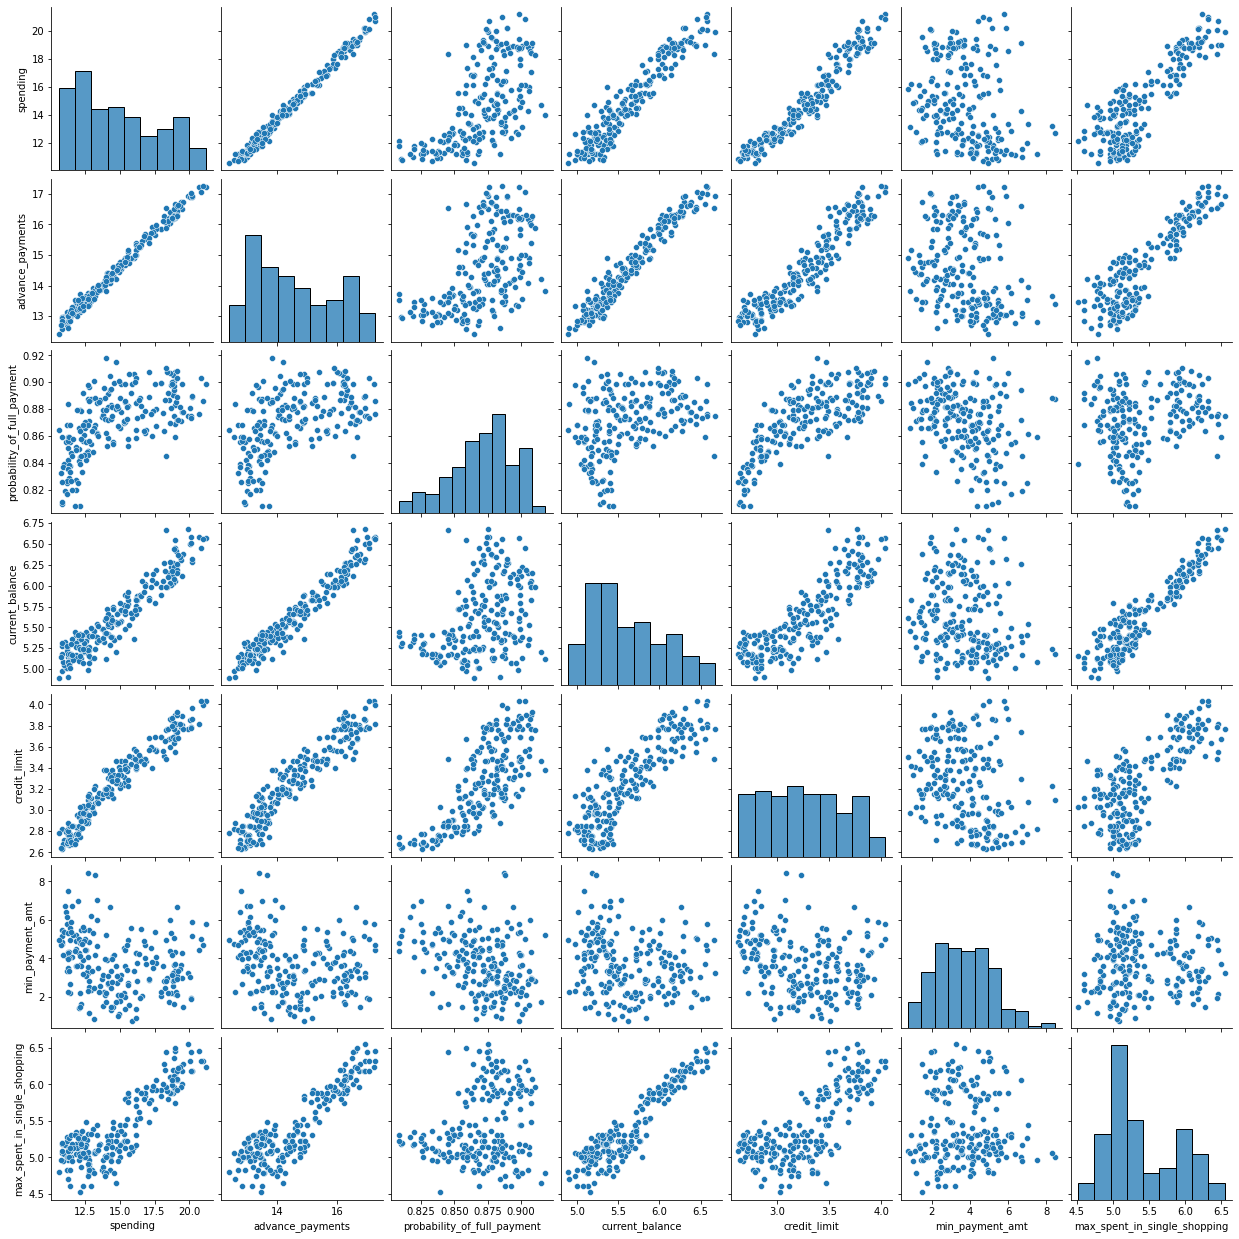

In [18]:
sns.pairplot(ds)

<AxesSubplot:>

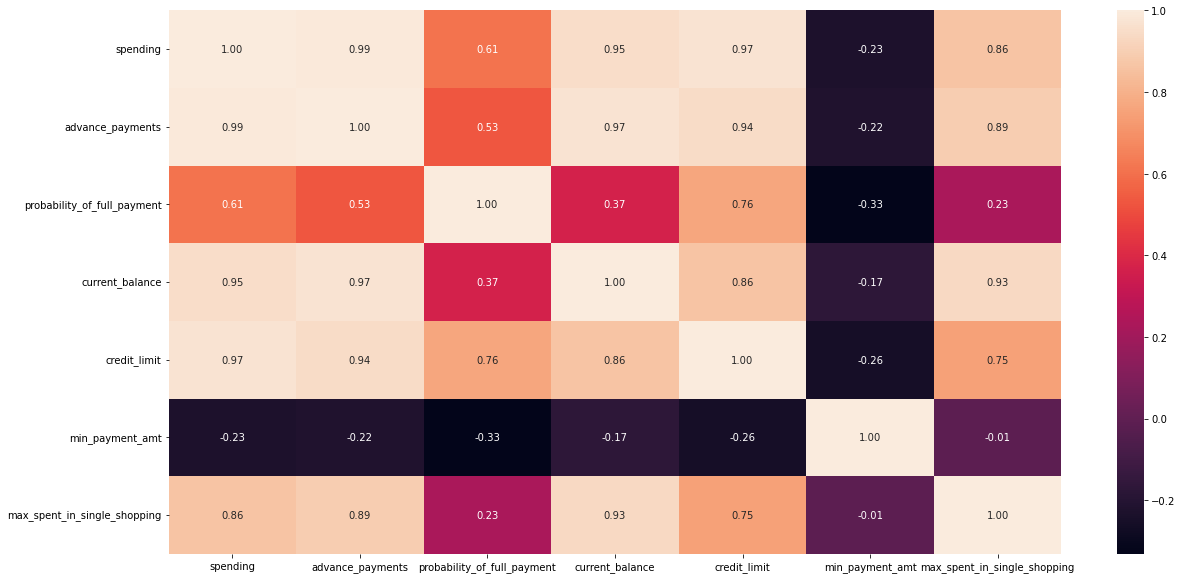

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(ds.corr(),annot=True,fmt=".2f")

# 1.2  Do you think scaling is necessary for clustering in this case? Justify

In [20]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(ds)
scaled_data

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [21]:
scaled_data=pd.DataFrame(scaled_data,index=ds.index,columns=ds.columns)
scaled_data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [22]:
scaled_data.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,9.148766e-16,1.002389,-1.466714,-0.887955,-0.169674,0.846599,2.181534
advance_payments,210.0,1.097006e-16,1.002389,-1.649686,-0.851433,-0.183664,0.887069,2.065260
probability_of_full_payment,210.0,1.243978e-15,1.002389,-2.668236,-0.598079,0.103993,0.711677,2.006586
current_balance,210.0,-1.089076e-16,1.002389,-1.650501,-0.828682,-0.237628,0.794595,2.367533
credit_limit,210.0,-2.994298e-16,1.002389,-1.668209,-0.834907,-0.057335,0.804496,2.055112
min_payment_amt,210.0,5.302637e-16,1.002389,-1.956769,-0.759148,-0.067469,0.712379,3.170590
max_spent_in_single_shopping,210.0,-1.935489e-15,1.002389,-1.813288,-0.740495,-0.377459,0.956394,2.328998


In [23]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


# 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

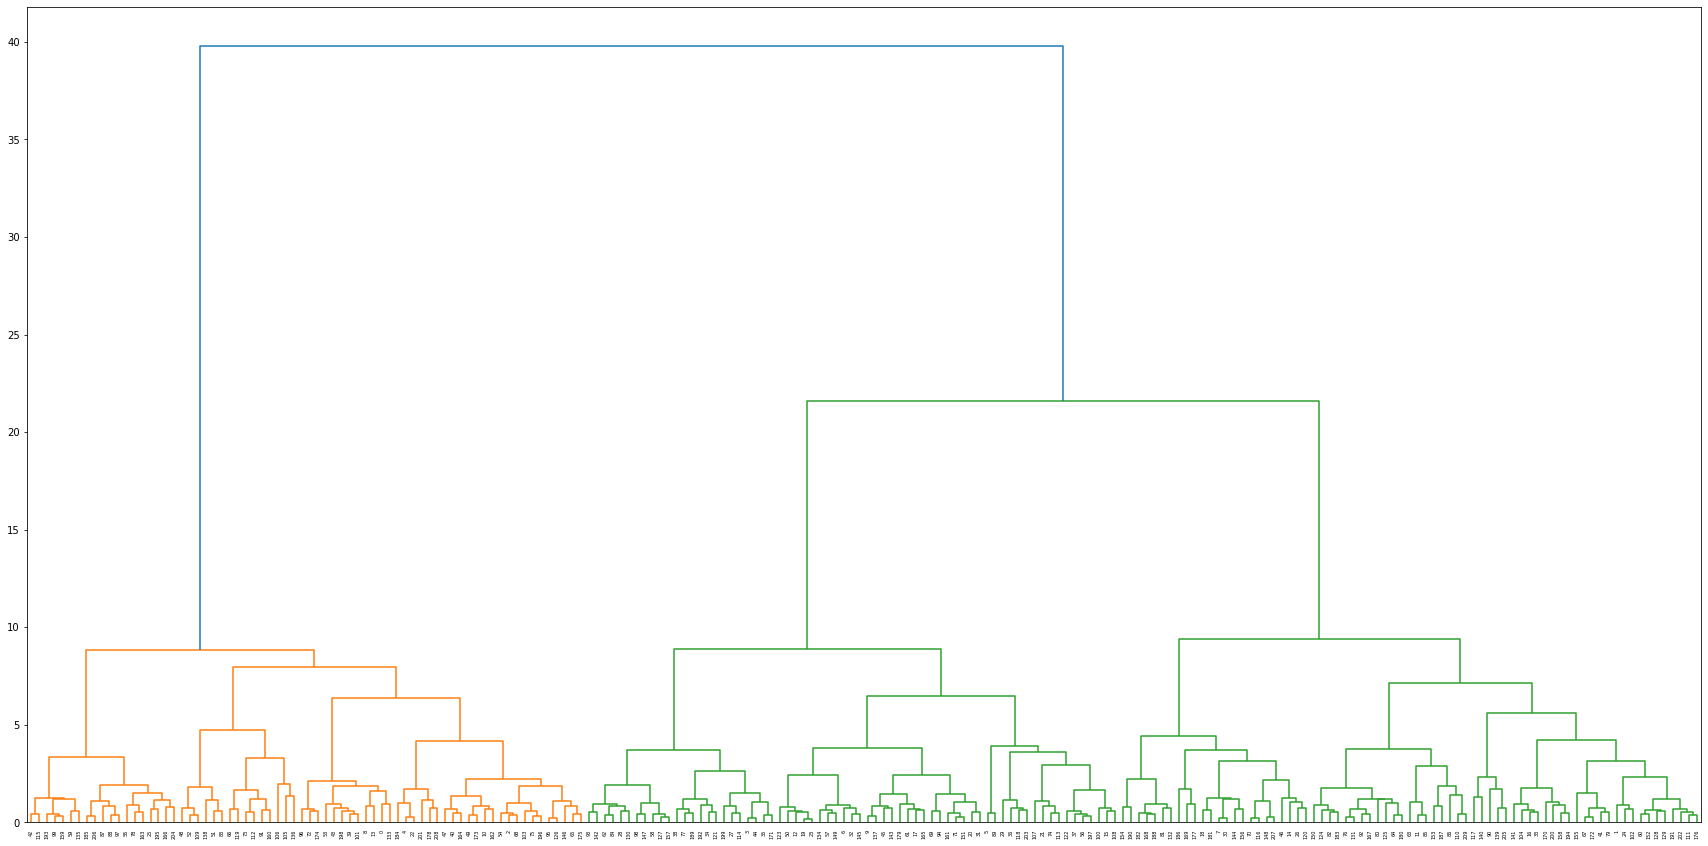

In [24]:
plt.figure(figsize=(30,15))
wardlink=linkage(scaled_data,method='ward')
dend=dendrogram(wardlink)

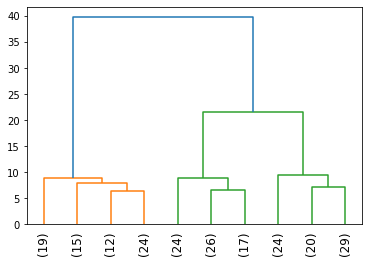

In [25]:
dend=dendrogram(wardlink,truncate_mode='lastp',p=10,leaf_rotation=90,leaf_font_size=12)

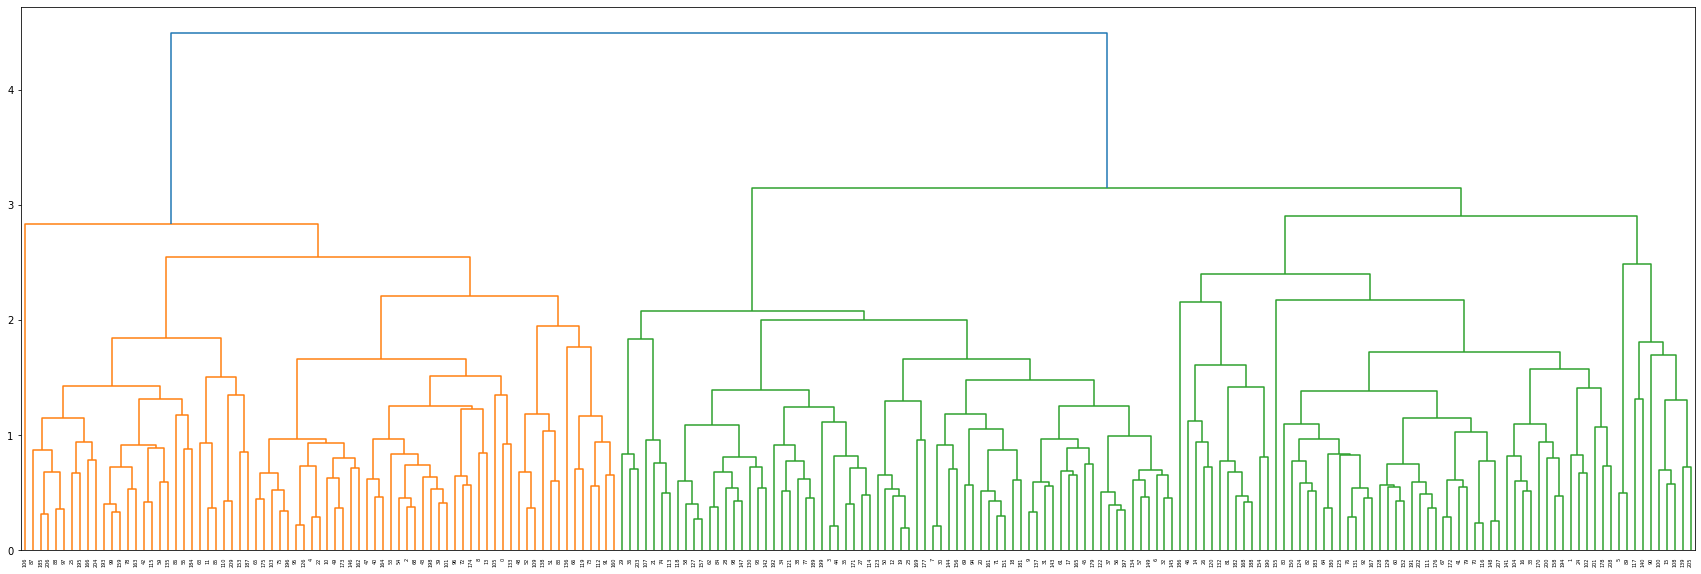

In [26]:
plt.figure(figsize=(30,10))
link_method = linkage(scaled_data,method = 'average')
dend = dendrogram(link_method)

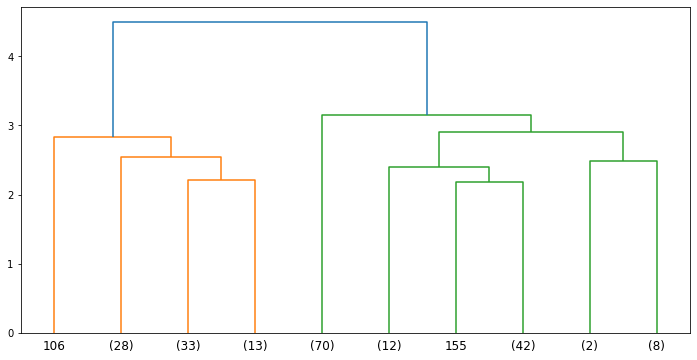

In [27]:
plt.figure(figsize=(12,6))
dend = dendrogram(link_method , truncate_mode= 'lastp', p =10)

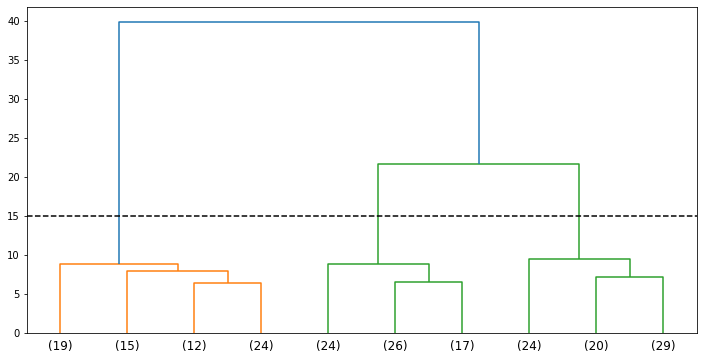

In [28]:
plt.figure(figsize=(12,6))
dend_ward = dendrogram(wardlink , truncate_mode= 'lastp', p =10)
plt.axhline(y = 15 , color = 'black', linestyle = '--')

In [29]:
clusters=fcluster(wardlink,3,criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [30]:
clusters_1=fcluster(wardlink,25,criterion='distance')
clusters_1

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [31]:
scaled_data["clusters"]=clusters
scaled_data.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998,1
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582,3
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107,1
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961,2
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813,1


In [32]:
scaled_data.clusters.value_counts().sort_index()

1    70
2    67
3    73
Name: clusters, dtype: int64

In [33]:
agg_data_1=scaled_data.groupby('clusters').mean()
agg_data_1['Freq']=scaled_data.clusters.value_counts().sort_index()
agg_data_1

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,1.213983,1.217445,0.568505,1.198256,1.130594,-0.040697,1.242686,70
2,-1.024932,-0.999559,-0.972589,-0.881418,-1.088249,0.832836,-0.583025,67
3,-0.223402,-0.250010,0.347508,-0.340041,-0.085328,-0.725360,-0.656511,73


# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters

In [34]:
k_means = KMeans(n_clusters= 2)

In [35]:
k_means.fit(scaled_data)

KMeans(n_clusters=2)

In [36]:
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [37]:
k_means.inertia_

708.5447375888274

In [38]:
k_means= KMeans(n_clusters=3)
k_means.fit(scaled_data)
k_means.inertia_

441.51465467155333

In [39]:
k_means= KMeans(n_clusters=4)
k_means.fit(scaled_data)
k_means.inertia_

390.5184238129516

In [40]:
k_means= KMeans(n_clusters=1)
k_means.fit(scaled_data)
k_means.inertia_

C:\Users\dheepig\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1612.9571428571423

In [41]:
k_means= KMeans(n_clusters=5)
k_means.fit(scaled_data)
k_means.inertia_

343.4988235195684

In [42]:
wss=[]

In [43]:
for i in range(1,11):
    KM=KMeans(n_clusters=i)
    KM.fit(scaled_data)
    wss.append(KM.inertia_)

C:\Users\dheepig\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [44]:
wss

[1612.9571428571423,
 708.5447375888274,
 441.52413869976266,
 390.5184238129516,
 346.45297551117363,
 304.8612938928286,
 276.6694254502569,
 252.91402059076077,
 233.9181438984097,
 215.0531516503669]

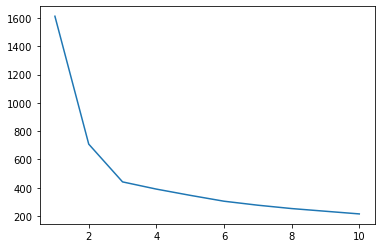

In [45]:
plt.plot(range(1,11),wss)

In [46]:
k_means= KMeans(n_clusters=3)
k_means.fit(scaled_data)
k_means.labels_

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 2,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 2, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 2, 0])

In [47]:
k_means= KMeans(n_clusters=3)
k_means.fit(scaled_data)
labels=k_means.labels_

In [48]:
ds["Clus_kmeans"]=labels
ds.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [49]:
silhouette_score(scaled_data,labels)

0.45292864264894567

In [50]:
sil_width=silhouette_samples(scaled_data,labels)
sil_width

array([ 0.59893241,  0.42259236,  0.67383951,  0.53321696,  0.48879227,
        0.25651878,  0.5087715 ,  0.43101421,  0.57847835,  0.5508297 ,
        0.55019441,  0.18599694,  0.42379009,  0.56729491,  0.23909398,
        0.27731058,  0.39730759,  0.51753704,  0.09886809,  0.2835991 ,
        0.39266125,  0.42459787,  0.53694948,  0.30531722,  0.52053763,
        0.30259023,  0.36245481,  0.53137062,  0.57298878,  0.46280348,
        0.43975776,  0.44551349,  0.43721862,  0.44157874,  0.56076305,
        0.58447369,  0.5351869 ,  0.46911306,  0.53391656,  0.65335252,
        0.61488306,  0.51686215,  0.51644279,  0.63636735,  0.5359082 ,
        0.38215258,  0.37828787,  0.62376209,  0.5565092 ,  0.60318938,
        0.35151513,  0.55873335,  0.62836577,  0.63887817,  0.6637623 ,
        0.43354252,  0.48457598,  0.57573245,  0.59983318,  0.62464675,
        0.5641739 ,  0.53309524,  0.57090427,  0.28819046,  0.52118491,
        0.61366414,  0.60150944,  0.54687097,  0.66641715,  0.12

In [51]:
ds["sil_width"]=sil_width
ds.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.598932
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0.422592
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0.673840
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,0.533217
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.488792


In [52]:
from sklearn .datasets import make_blobs
X,Y = make_blobs()
no_of_clusters=[2,3,4,5,6]
for n_clusters in no_of_clusters:
    cluster=KMeans(n_clusters=n_clusters)
    cluster_labels=cluster.fit_predict(X)
    silhouette_average=silhouette_score(X,cluster_labels)
    print("For no of clusters =",n_clusters,"The average silhouette score is :",silhouette_average)

For no of clusters = 2 The average silhouette score is : 0.6142843048361051
For no of clusters = 3 The average silhouette score is : 0.7035643153270738
For no of clusters = 4 The average silhouette score is : 0.5732758227124134
For no of clusters = 5 The average silhouette score is : 0.48732236769964354
For no of clusters = 6 The average silhouette score is : 0.35550588196921823


In [53]:
silhouette_samples(ds,labels).min()
#all sil width scores are +ve as we do not se any -ve values

-0.18011074449598102

In [54]:
agg_data_2=ds.groupby('Clus_kmeans').mean()
agg_data_2['Freq']=ds.Clus_kmeans.value_counts().sort_index()
agg_data_2

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width,Freq
Clus_kmeans,,,,,,,,,
0,11.843433,13.247313,0.847304,5.236791,2.842433,4.912881,5.122821,0.452881,67
1,18.346901,16.135775,0.884263,6.156690,3.681535,3.616634,6.015394,0.525947,71
2,14.192222,14.225556,0.879967,5.472250,3.228819,2.654142,5.074625,0.380969,72


In [55]:
ds.to_csv('bank_scaled_data.csv')

# 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [56]:
ds["clusters"]=clusters
ds.clusters.value_counts().sort_index()

1    70
2    67
3    73
Name: clusters, dtype: int64

In [57]:
agg_data_1=ds.groupby('clusters').mean()
agg_data_1['Freq']=ds.clusters.value_counts().sort_index()
agg_data_1.T

clusters,1,2,3
spending,18.371429,11.872388,14.199041
advance_payments,16.145429,13.257015,14.233562
probability_of_full_payment,0.884400,0.848072,0.879190
current_balance,6.158171,5.238940,5.478233
credit_limit,3.684629,2.848537,3.226452
min_payment_amt,3.639157,4.949433,2.612181
max_spent_in_single_shopping,6.017371,5.122209,5.086178
Clus_kmeans,1.000000,0.029851,1.958904
sil_width,0.533788,0.449442,0.378593
Freq,70.000000,67.000000,73.000000


In [58]:
ds.Clus_kmeans.value_counts().sort_index()

0    67
1    71
2    72
Name: Clus_kmeans, dtype: int64

In [59]:
agg_data_2=ds.groupby('Clus_kmeans').mean()
agg_data_2['Freq']=ds.Clus_kmeans.value_counts().sort_index()
agg_data_2.T

Clus_kmeans,0,1,2
spending,11.843433,18.346901,14.192222
advance_payments,13.247313,16.135775,14.225556
probability_of_full_payment,0.847304,0.884263,0.879967
current_balance,5.236791,6.156690,5.472250
credit_limit,2.842433,3.681535,3.228819
min_payment_amt,4.912881,3.616634,2.654142
max_spent_in_single_shopping,5.122821,6.015394,5.074625
sil_width,0.452881,0.525947,0.380969
clusters,2.014925,1.028169,2.986111
Freq,67.000000,71.000000,72.000000


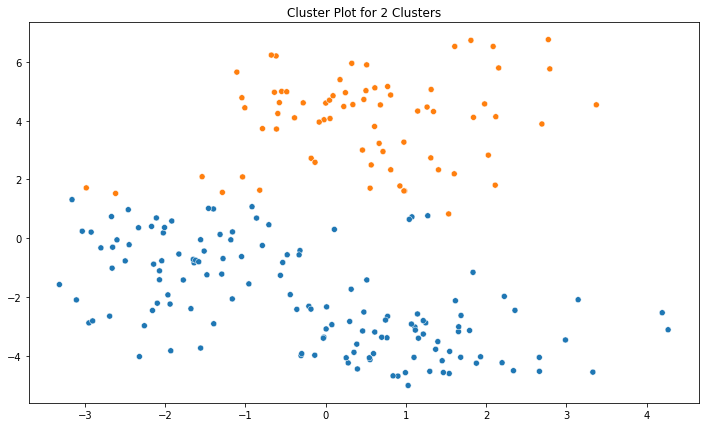

In [60]:
pca_2=PCA(2)
plot_columns=pca_2.fit_transform(ds)
plt.figure(figsize=(12,7))
sns.scatterplot(x=plot_columns[:,1],y=plot_columns[:,0],hue=KMeans(n_clusters=2,random_state=0).fit(ds).labels_,legend=False)
plt.title('Cluster Plot for 2 Clusters')
plt.show()

<AxesSubplot:xlabel='probability_of_full_payment', ylabel='spending'>

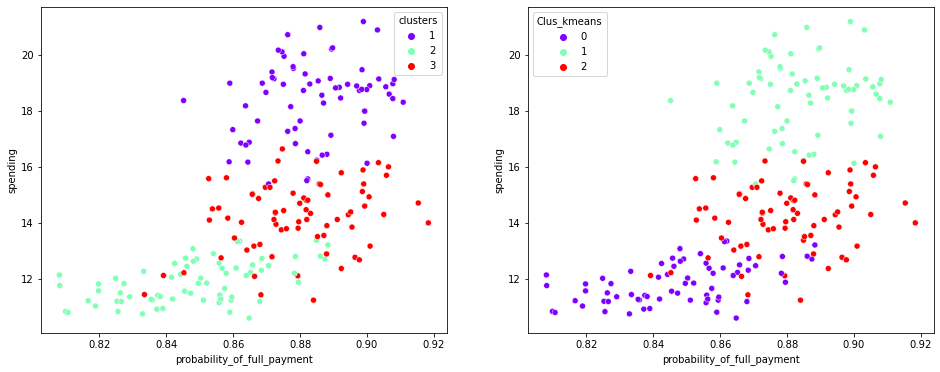

In [61]:
fig , axs1 = plt.subplots(nrows= 1, ncols= 2, squeeze= False, figsize=(16,6))
sns.scatterplot(x = 'probability_of_full_payment' ,y = 'spending', hue = 'clusters', palette= 'rainbow' ,data = ds, ax = axs1[0][0])
sns.scatterplot(x = 'probability_of_full_payment' ,y = 'spending', hue = 'Clus_kmeans', palette= 'rainbow' , data = ds, ax = axs1[0][1])

In [62]:
clus_profile1 = scaled_data.drop(['spending'],axis=1)
clust_profile1=clus_profile1.groupby('clusters').mean()
clust_profile1['freq']=ds.clusters.value_counts().sort_index()
clus_profile1

,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998,1
1,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582,3
2,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107,1
3,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961,2
4,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813,1
...,...,...,...,...,...,...,...
205,-0.413929,0.721222,-0.428801,-0.158181,0.190536,-1.366631,3
206,0.814152,-0.305372,0.675253,0.476084,0.813214,0.789153,1
207,-0.306472,0.364883,-0.431064,-0.152873,-1.322158,-0.830235,3
208,0.338271,1.230277,0.182048,0.600814,-0.953484,0.071238,1


In [63]:
clust_profile1 = ds.drop(['spending'],axis=1)
clust_profile1=clus_profile1.groupby('clusters').mean()
clust_profile1['freq']=ds.clusters.value_counts().sort_index()
clust_profile1

,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
clusters,,,,,,,
1,1.217445,0.568505,1.198256,1.130594,-0.040697,1.242686,70
2,-0.999559,-0.972589,-0.881418,-1.088249,0.832836,-0.583025,67
3,-0.250010,0.347508,-0.340041,-0.085328,-0.725360,-0.656511,73


In [64]:
clus_profile = ds.drop(['spending'],axis=1)
clust_profile=clus_profile.groupby('Clus_kmeans').mean()
clust_profile['freq']=ds.Clus_kmeans.value_counts().sort_index()
clus_profile

,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width,clusters
0,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.598932,1
1,14.89,0.9064,5.363,3.582,3.336,5.144,2,0.422592,3
2,16.42,0.8829,6.248,3.755,3.368,6.148,1,0.673840,1
3,12.96,0.8099,5.278,2.641,5.182,5.185,0,0.533217,2
4,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.488792,1
...,...,...,...,...,...,...,...,...,...
205,14.02,0.8880,5.439,3.199,3.986,4.738,2,0.363371,3
206,15.62,0.8638,5.927,3.438,4.920,5.795,1,0.421463,1
207,14.16,0.8796,5.438,3.201,1.717,5.001,2,0.542743,3
208,15.00,0.9000,5.709,3.485,2.270,5.443,1,0.104700,1


In [65]:
clust_profile = ds.drop(['spending'],axis=1)
clust_profile=clus_profile.groupby('Clus_kmeans').mean()
clust_profile['freq']=ds.Clus_kmeans.value_counts().sort_index()
clust_profile

,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width,clusters,freq
Clus_kmeans,,,,,,,,,
0,13.247313,0.847304,5.236791,2.842433,4.912881,5.122821,0.452881,2.014925,67
1,16.135775,0.884263,6.156690,3.681535,3.616634,6.015394,0.525947,1.028169,71
2,14.225556,0.879967,5.472250,3.228819,2.654142,5.074625,0.380969,2.986111,72


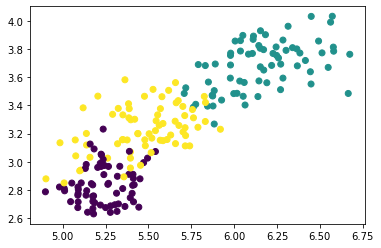

In [66]:
plt.scatter(ds['current_balance'],ds['credit_limit'],c=ds['Clus_kmeans']);

# Problem 2 -Insurance Data Analysis

In [67]:
ds1=pd.read_csv('C:/Users/dheepig/Desktop/Dheepika/Great Lakes/Session 4- Data Mining/Project/Datasets/insurance_part2_data-2.csv')
ds1.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


# 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [68]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [69]:
ds1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [70]:
ds1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
row, col = ds1.shape
print("There are total {}".format(row), "rows and {}".format(col), "columns in the dataset")

There are total 3000 rows and 10 columns in the dataset


In [72]:
ds1.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [73]:
dup=ds1.duplicated().sum()
print("There are total {}".format(dup), "duplicate records in the dataset")

There are total 139 duplicate records in the dataset


In [74]:
ds1.skew(axis=0,skipna=True)

Age           1.149713
Commision     3.148858
Duration     13.784681
Sales         2.381148
dtype: float64

In [75]:
corr1=ds1.corr()
round(corr1,2)

,Age,Commision,Duration,Sales
Age,1.00,0.07,0.03,0.04
Commision,0.07,1.00,0.47,0.77
Duration,0.03,0.47,1.00,0.56
Sales,0.04,0.77,0.56,1.00


<AxesSubplot:>

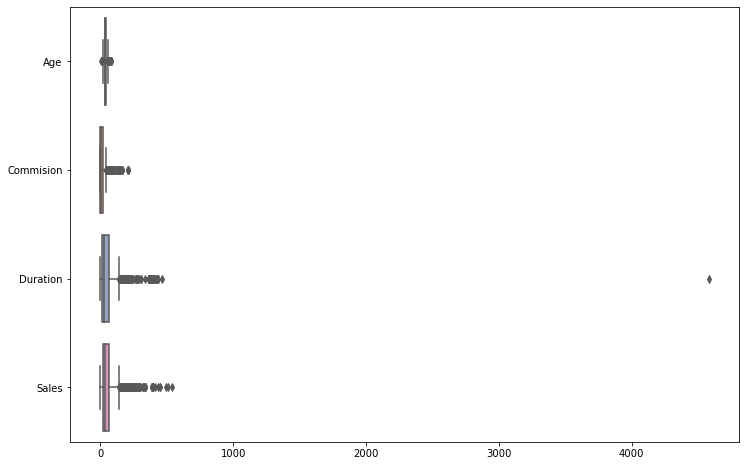

In [76]:
plt.figure(figsize=(12,8))
sns.boxplot(data=ds1,orient="h", palette="Set2")

In [77]:
for column in ds1[['Agency_Code', 'Type', 'Claimed', 'Channel',
                   'Product Name', 'Destination']]:
    print(column.upper(),': ',ds1[column].nunique())
    print(ds1[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




In [78]:
ds1.drop_duplicates()
dups=ds1.duplicated()
print('Number of duplicate rows = %d'%(dups.sum()))
print(ds1.shape)

Number of duplicate rows = 139
(3000, 10)


In [79]:
ds1.Claimed.value_counts(normalize=True)

No     0.692
Yes    0.308
Name: Claimed, dtype: float64

In [80]:
ds1.Claimed.value_counts()

No     2076
Yes     924
Name: Claimed, dtype: int64

## Univariate Analysis

In [81]:
ds1[['Age','Commision','Duration','Sales']].describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


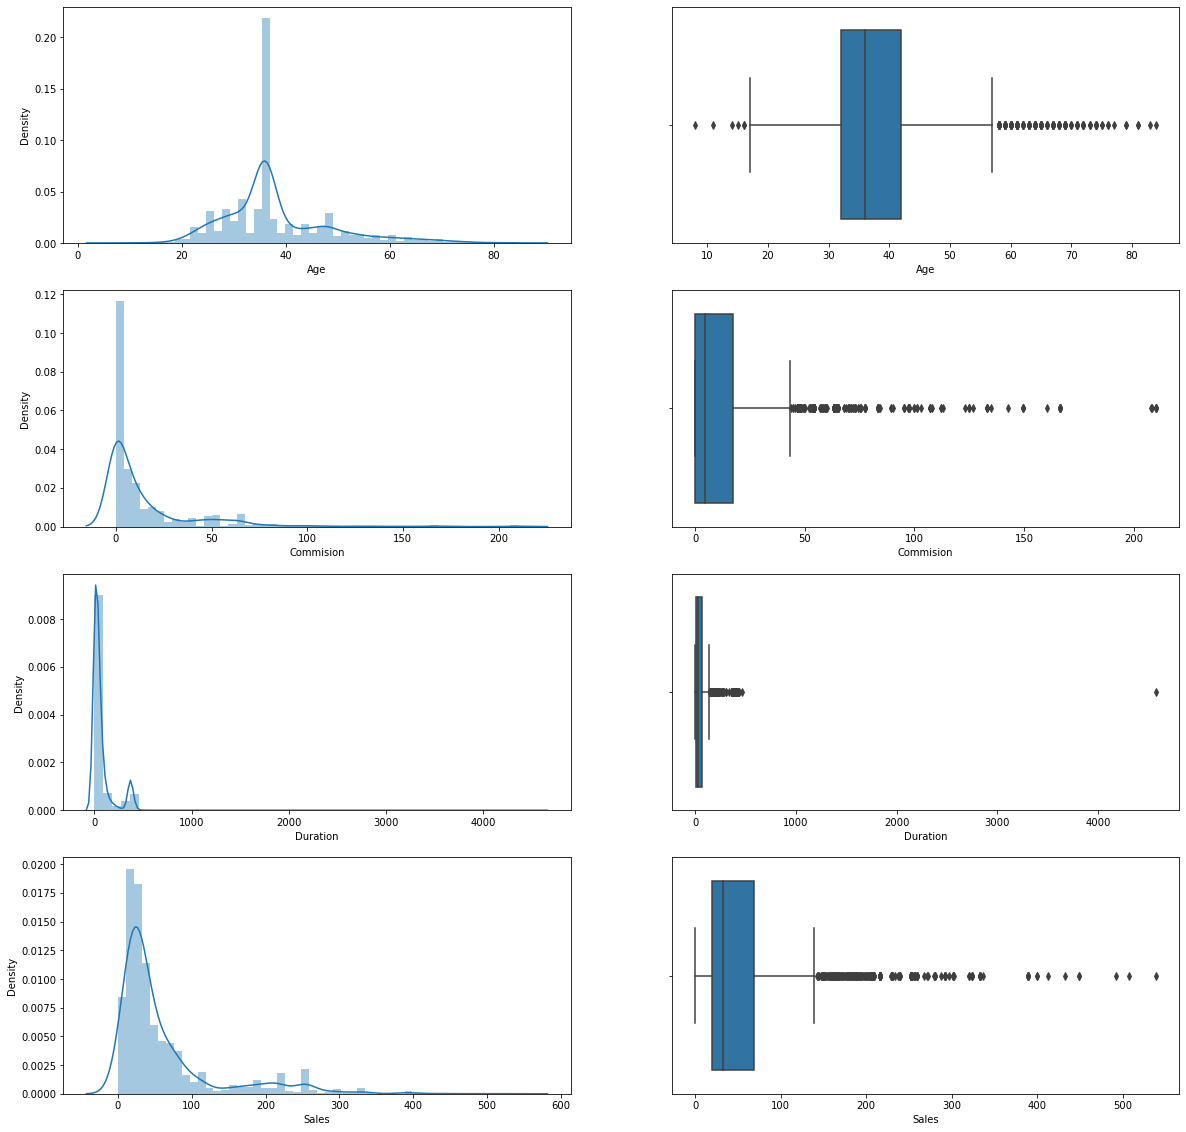

In [82]:
fig,axes=plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,20)
sns.distplot(ds1['Age'],kde=True,ax=axes[0][0])
sns.boxplot(x='Age',data=ds1,ax=axes[0][1])
sns.distplot(ds1['Commision'],kde=True,ax=axes[1][0])
sns.boxplot(x='Commision',data=ds1,ax=axes[1][1])
sns.distplot(ds1['Duration'],kde=True,ax=axes[2][0])
sns.boxplot(x='Duration',data=ds1,ax=axes[2][1])
sns.distplot(ds1['Sales'],kde=True,ax=axes[3][0])
sns.boxplot(x='Sales',data=ds1,ax=axes[3][1])
plt.show()

## Bivariate Analysis

<Figure size 1440x1440 with 0 Axes>

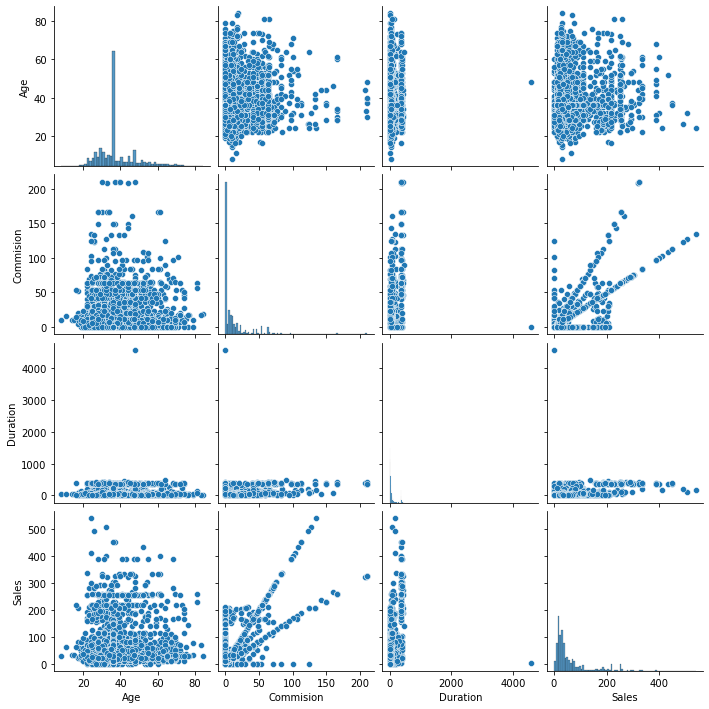

In [83]:
plt.figure(figsize=(20,20))
sns.pairplot(ds1)

## Multivariate Analysis

C:\Users\dheepig\AppData\Local\Temp/ipykernel_19588/788329973.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(ds1.corr(), dtype=np.bool))


<AxesSubplot:>

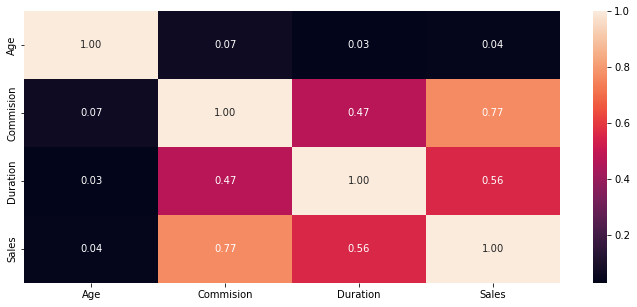

In [84]:
plt.figure(figsize=(12,5))
mask = np.triu(np.ones_like(ds1.corr(), dtype=np.bool))
sns.heatmap(ds1.corr(),annot=True,fmt=".2f")

# 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [85]:
for feature in ds1.columns:
    if ds1[feature].dtype == 'object':
        ds1[feature]=pd.Categorical(ds1[feature]).codes

In [86]:
ds1.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

In [87]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


### Extracting the target column into separate vectors for training set and test set

In [88]:
x=ds1.drop("Claimed",axis=1)
y=ds1.pop("Claimed")

### Scaling the attributes

In [89]:
from scipy.stats import zscore
x_scaled=x.apply(zscore)
x_scaled.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,0.947162,-1.314358,-1.256796,-0.542807,0.124788,-0.470051,-0.816433,0.268835,-0.434646
1,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.268605,-0.569127,0.268835,-0.434646
2,0.086888,-0.308215,0.795674,-0.337133,0.124788,-0.499894,-0.711940,0.268835,1.303937
3,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.492433,-0.484288,-0.525751,-0.434646
4,-0.486629,1.704071,-1.256796,-0.323003,0.124788,-0.126846,-0.597407,-1.320338,-0.434646


### Splitting data into training and test set

In [90]:
x_train,x_test,train_labels,test_labels=train_test_split(x,y,test_size=.30,random_state=1)

### Checking the dimensions of the training and test data

In [91]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

x_train (2100, 9)
x_test (900, 9)
train_labels (2100,)
test_labels (900,)


### Building a Decision Tree Classifier - CART Model

In [92]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150],
    'min_samples_split': [150,300,450],
}
dtcl = DecisionTreeClassifier(random_state=1)
grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [93]:
grid_search_dtcl.fit(x_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=1)

In [94]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3, 5, 7, 10,12],
    'min_samples_leaf': [20,30,40,50,60],
    'min_samples_split': [150,300,450],
}
dtcl = DecisionTreeClassifier(random_state=1)
grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [95]:
grid_search_dtcl.fit(x_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 20, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=7, min_samples_leaf=20, min_samples_split=150,
                       random_state=1)

In [96]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3.5,4.0,4.5, 5.0,5.5],
    'min_samples_leaf': [40, 42, 44,46,48,50,52,54],
    'min_samples_split': [250, 270, 280, 290, 300,310],
}
dtcl = DecisionTreeClassifier(random_state=1)
grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [97]:
grid_search_dtcl.fit(x_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 4.0, 'min_samples_leaf': 46, 'min_samples_split': 280}


DecisionTreeClassifier(max_depth=4.0, min_samples_leaf=46,
                       min_samples_split=280, random_state=1)

### Generating Tree

In [98]:
train_char_label = ['no', 'yes']
tree_regularized = open('credit_tree_reg.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized ,feature_names = list(x_train), class_names = list(train_char_label))
tree_regularized.close()
dot_data

### Variable Importance - CART

In [99]:
print(pd.DataFrame(best_grid_dtcl.feature_importances_,columns=["Imp"],index=x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.621974
Sales         0.257721
Product Name  0.057386
Commision     0.023406
Duration      0.023111
Age           0.016403
Type          0.000000
Channel       0.000000
Destination   0.000000


### Predicting on Training and Test dataset

In [100]:
ytrain_predict_dtcl=best_grid_dtcl.predict(x_train)
ytest_predict_dtcl=best_grid_dtcl.predict(x_test)

### Getting the Predicted Classes and Probs

In [101]:
ytest_predict_dtcl
ytest_predict_prob_dtcl=best_grid_dtcl.predict_proba(x_test)
ytest_predict_prob_dtcl
pd.DataFrame(ytest_predict_prob_dtcl).head()

,0,1
0,0.887805,0.112195
1,0.432432,0.567568
2,0.432432,0.567568
3,0.208163,0.791837
4,0.937143,0.062857


In [102]:
print(classification_report(train_labels,ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1471
           1       0.67      0.59      0.63       629

    accuracy                           0.79      2100
   macro avg       0.75      0.73      0.74      2100
weighted avg       0.78      0.79      0.79      2100



In [103]:
print(classification_report(test_labels,ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       605
           1       0.71      0.49      0.58       295

    accuracy                           0.77       900
   macro avg       0.75      0.70      0.71       900
weighted avg       0.76      0.77      0.75       900



### Getting the Predicted Classes and Probs

In [104]:
ytest_predict_dtcl

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [105]:
cart_metrics=classification_report(train_labels, ytrain_predict_dtcl,output_dict=True)
ds1=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(ds1.loc["1"][0],2)
cart_train_recall=round(ds1.loc["1"][1],2)
cart_train_f1=round(ds1.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.67
cart_train_recall  0.59
cart_train_f1  0.63


In [106]:
cart_metrics=classification_report(test_labels, ytest_predict_dtcl,output_dict=True)
ds1=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(ds1.loc["1"][0],2)
cart_test_recall=round(ds1.loc["1"][1],2)
cart_test_f1=round(ds1.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.71
cart_test_recall  0.49
cart_test_f1  0.58


### Building a Random Forest Classifier

In [107]:
param_grid_rfcl = {
    'max_depth': [10],## 20,30,40
    'max_features': [6],## 7,8,9
    'min_samples_leaf': [10],## 50,100
    'min_samples_split': [50], ## 60,70
    'n_estimators': [300] ## 100,200
}
rfcl = RandomForestClassifier(random_state=1)
grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

In [108]:
grid_search_rfcl.fit(x_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10], 'max_features': [6],
                         'min_samples_leaf': [10], 'min_samples_split': [50],
                         'n_estimators': [300]})

In [109]:
grid_search_rfcl.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 300}

In [110]:
best_grid_rfcl = grid_search_rfcl.best_estimator_
best_grid_rfcl

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=10,
                       min_samples_split=50, n_estimators=300, random_state=1)

### Variable Importance

In [111]:
print (pd.DataFrame(best_grid_rfcl.feature_importances_, columns = ["Imp"],index = x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.349944
Sales         0.188456
Product Name  0.170146
Commision     0.100971
Duration      0.093409
Age           0.067548
Type          0.020343
Destination   0.008332
Channel       0.000851


In [112]:
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(x_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,0.776728,0.223272
1,0.449963,0.550037
2,0.455649,0.544351
3,0.240252,0.759748
4,0.956507,0.043493


### Predicting the Training and Testing data

In [113]:
ytrain_predict_rfcl = best_grid_rfcl.predict(x_train)
ytest_predict_rfcl = best_grid_rfcl.predict(x_test)

### Getting the Predicted Classes and Probs

In [114]:
ytest_predict_rfcl
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(x_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,0.776728,0.223272
1,0.449963,0.550037
2,0.455649,0.544351
3,0.240252,0.759748
4,0.956507,0.043493


### RF Model Performance Evaluation on Training data

In [115]:
print(classification_report(train_labels,ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1471
           1       0.74      0.61      0.67       629

    accuracy                           0.82      2100
   macro avg       0.79      0.76      0.77      2100
weighted avg       0.81      0.82      0.81      2100



In [116]:
rf_metrics=classification_report(train_labels, ytrain_predict_rfcl,output_dict=True)
ds1=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(ds1.loc["1"][0],2)
rf_train_recall=round(ds1.loc["1"][1],2)
rf_train_f1=round(ds1.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.74
rf_train_recall  0.61
rf_train_f1  0.67


### RF Model Performance Evaluation on Test data

In [117]:
print(classification_report(test_labels,ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       605
           1       0.73      0.47      0.58       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.71       900
weighted avg       0.77      0.77      0.76       900



In [118]:
rf_metrics=classification_report(test_labels, ytest_predict_rfcl,output_dict=True)
ds1=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(ds1.loc["1"][0],2)
rf_test_recall=round(ds1.loc["1"][1],2)
rf_test_f1=round(ds1.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.73
rf_test_recall  0.47
rf_test_f1  0.58


### Building a Artificial Neural Network Classifier

In [119]:
param_grid_nncl = {
    'hidden_layer_sizes': [100], # 50, 200
    'max_iter': [2500], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01],
}
nncl = MLPClassifier(random_state=1)
grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

In [120]:
grid_search_nncl.fit(x_train, train_labels)
grid_search_nncl.best_params_

{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [121]:
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)

### Predicting the Training and Testing data

In [122]:
ytrain_predict_nncl = best_grid_nncl.predict(x_train)
ytest_predict_nncl = best_grid_nncl.predict(x_test)

### ANN Model Performance Evaluation on Training data

In [123]:
nn_train_acc=best_grid_nncl.score(x_train,train_labels)
nn_train_acc

0.7885714285714286

In [124]:
print(classification_report(train_labels,ytrain_predict_nncl))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1471
           1       0.67      0.58      0.62       629

    accuracy                           0.79      2100
   macro avg       0.75      0.73      0.74      2100
weighted avg       0.78      0.79      0.78      2100



In [125]:
nn_metrics=classification_report(train_labels, ytrain_predict_nncl,output_dict=True)
ds1=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(ds1.loc["1"][0],2)
nn_train_recall=round(ds1.loc["1"][1],2)
nn_train_f1=round(ds1.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.67
nn_train_recall  0.58
nn_train_f1  0.62


### ANN Model Performance Evaluation on Test data

In [126]:
nn_test_acc=best_grid_nncl.score(x_test,test_labels)
nn_test_acc

0.7644444444444445

In [127]:
print(classification_report(test_labels,ytest_predict_nncl))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       605
           1       0.71      0.48      0.57       295

    accuracy                           0.76       900
   macro avg       0.74      0.69      0.70       900
weighted avg       0.76      0.76      0.75       900



In [128]:
nn_metrics=classification_report(test_labels, ytest_predict_nncl,output_dict=True)
ds1=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(ds1.loc["1"][0],2)
nn_test_recall=round(ds1.loc["1"][1],2)
nn_test_f1=round(ds1.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.71
nn_test_recall  0.48
nn_test_f1  0.57


# 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

### CART - AUC and ROC for the training data

Area under Curve is 0.8250565517330825


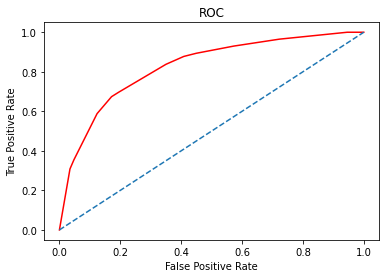

In [129]:
cart_train_fpr, cart_train_tpr,_=roc_curve(train_labels,best_grid_dtcl.predict_proba(x_train)[:,1])
plt.plot(cart_train_fpr,cart_train_tpr,color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
cart_train_auc=roc_auc_score(train_labels,best_grid_dtcl.predict_proba(x_train)[:,1])
print('Area under Curve is', cart_train_auc)

### CART - AUC and ROC for the test data

Area under Curve is 0.7916402857543073


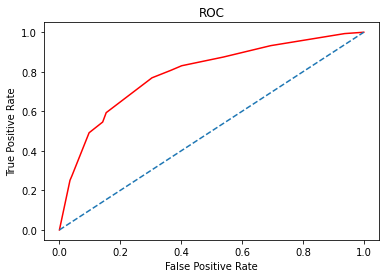

In [130]:
cart_test_fpr, cart_test_tpr,_=roc_curve(test_labels,best_grid_dtcl.predict_proba(x_test)[:,1])
plt.plot(cart_test_fpr,cart_test_tpr,color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
cart_test_auc=roc_auc_score(test_labels,best_grid_dtcl.predict_proba(x_test)[:,1])
print('Area under Curve is', cart_test_auc)

### CART Confusion Matrix and Classification Report for the training data

In [131]:
confusion_matrix(train_labels, ytrain_predict_dtcl)

array([[1289,  182],
       [ 259,  370]], dtype=int64)

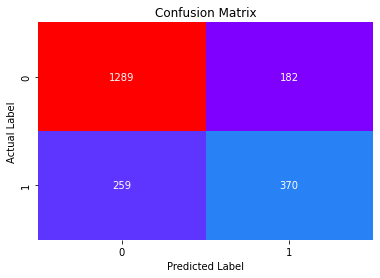

In [132]:
confusion_matrix(train_labels,ytrain_predict_dtcl)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict_dtcl),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [133]:
cart_train_acc=best_grid_dtcl.score(x_train,train_labels)
print('The score of CART-train model is:',cart_train_acc)

The score of CART-train model is: 0.79


In [134]:
print(classification_report(train_labels, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1471
           1       0.67      0.59      0.63       629

    accuracy                           0.79      2100
   macro avg       0.75      0.73      0.74      2100
weighted avg       0.78      0.79      0.79      2100



In [135]:
cart_metrics=classification_report(train_labels, ytrain_predict_dtcl,output_dict=True)
ds1=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(ds1.loc["1"][0],2)
cart_train_recall=round(ds1.loc["1"][1],2)
cart_train_f1=round(ds1.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.67
cart_train_recall  0.59
cart_train_f1  0.63


### CART Confusion Matrix and Classification Report for the testing data

In [136]:
confusion_matrix(test_labels, ytest_predict_dtcl)

array([[546,  59],
       [150, 145]], dtype=int64)

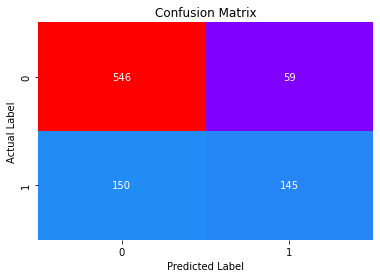

In [137]:
confusion_matrix(test_labels,ytest_predict_dtcl)
sns.heatmap(confusion_matrix(test_labels,ytest_predict_dtcl),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [138]:
cart_test_acc=best_grid_dtcl.score(x_test,test_labels)
print('The score of CART-test model is:',cart_test_acc)

The score of CART-test model is: 0.7677777777777778


In [139]:
print(classification_report(test_labels, ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       605
           1       0.71      0.49      0.58       295

    accuracy                           0.77       900
   macro avg       0.75      0.70      0.71       900
weighted avg       0.76      0.77      0.75       900



In [140]:
cart_metrics=classification_report(test_labels, ytest_predict_dtcl,output_dict=True)
ds1=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(ds1.loc["1"][0],2)
cart_test_recall=round(ds1.loc["1"][1],2)
cart_test_f1=round(ds1.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.71
cart_test_recall  0.49
cart_test_f1  0.58


### RF Model Performance Evaluation on Training data 

In [141]:
confusion_matrix(train_labels,ytrain_predict_rfcl)

array([[1335,  136],
       [ 246,  383]], dtype=int64)

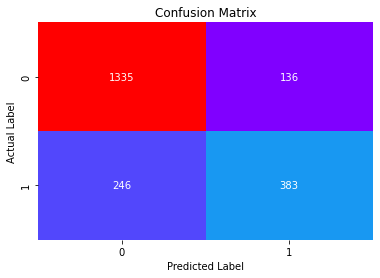

In [142]:
confusion_matrix(train_labels,ytrain_predict_rfcl)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict_rfcl),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [143]:
rf_train_acc=best_grid_rfcl.score(x_train,train_labels)
print('The score of RF-train model is:',rf_train_acc)

The score of RF-train model is: 0.8180952380952381


In [144]:
print(classification_report(train_labels,ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1471
           1       0.74      0.61      0.67       629

    accuracy                           0.82      2100
   macro avg       0.79      0.76      0.77      2100
weighted avg       0.81      0.82      0.81      2100



In [145]:
rf_metrics=classification_report(train_labels, ytrain_predict_rfcl,output_dict=True)
ds1=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(ds1.loc["1"][0],2)
rf_train_recall=round(ds1.loc["1"][1],2)
rf_train_f1=round(ds1.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.74
rf_train_recall  0.61
rf_train_f1  0.67


Area under Curve is 0.8744205676464645


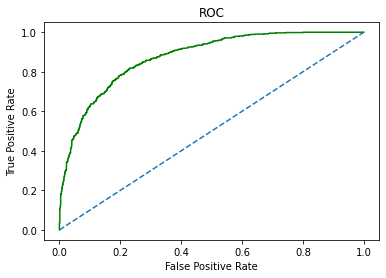

In [146]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid_rfcl.predict_proba(x_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid_rfcl.predict_proba(x_train)[:,1])
print('Area under Curve is', rf_train_auc)

### RF Model Performance Evaluation on Test data

In [147]:
confusion_matrix(test_labels,ytest_predict_rfcl)

array([[554,  51],
       [155, 140]], dtype=int64)

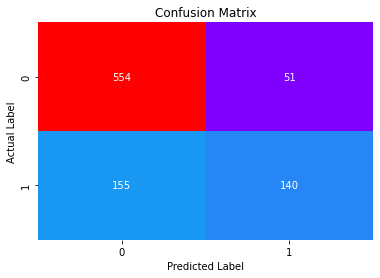

In [148]:
confusion_matrix(test_labels,ytest_predict_rfcl)
sns.heatmap(confusion_matrix(test_labels,ytest_predict_rfcl),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [149]:
rf_test_acc=best_grid_rfcl.score(x_test,test_labels)
print('The score of RF-test model is:',rf_test_acc)

The score of RF-test model is: 0.7711111111111111


In [150]:
print(classification_report(test_labels,ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       605
           1       0.73      0.47      0.58       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.71       900
weighted avg       0.77      0.77      0.76       900



In [151]:
rf_metrics=classification_report(test_labels, ytest_predict_rfcl,output_dict=True)
ds1=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(ds1.loc["1"][0],2)
rf_test_recall=round(ds1.loc["1"][1],2)
rf_test_f1=round(ds1.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.73
rf_test_recall  0.47
rf_test_f1  0.58


Area under Curve is 0.8226586356632581


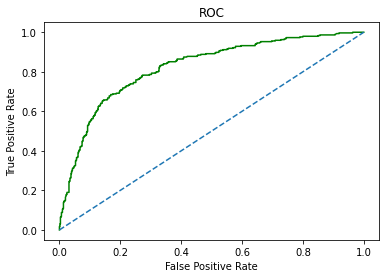

In [152]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid_rfcl.predict_proba(x_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid_rfcl.predict_proba(x_test)[:,1])
print('Area under Curve is', rf_test_auc)

### Building a Artificial Neural Network Classifier

### NN Model Performance Evaluation on Training data

In [153]:
param_grid_nncl = {
    'hidden_layer_sizes': [100], # 50, 200
    'max_iter': [2500], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01],
}
nncl = MLPClassifier(random_state=1)
grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

In [154]:
grid_search_nncl.fit(x_train, train_labels)
grid_search_nncl.best_params_

{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [155]:
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)

### Predicting the Training and Testing data

In [156]:
ytrain_predict_nncl = best_grid_nncl.predict(x_train)
ytest_predict_nncl = best_grid_nncl.predict(x_test)

### ANN Model Performance Evaluation on Training data

In [157]:
confusion_matrix(train_labels,ytrain_predict_nncl)

array([[1289,  182],
       [ 262,  367]], dtype=int64)

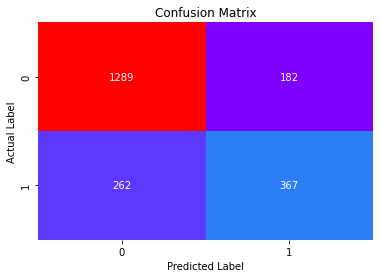

In [158]:
confusion_matrix(train_labels,ytrain_predict_nncl)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict_nncl),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [159]:
nn_train_acc=best_grid_nncl.score(x_train,train_labels)
print('The score of ANN-train model is:',nn_train_acc)

The score of ANN-train model is: 0.7885714285714286


In [160]:
print(classification_report(train_labels,ytrain_predict_nncl))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1471
           1       0.67      0.58      0.62       629

    accuracy                           0.79      2100
   macro avg       0.75      0.73      0.74      2100
weighted avg       0.78      0.79      0.78      2100



In [161]:
nn_metrics=classification_report(train_labels, ytrain_predict_nncl,output_dict=True)
ds1=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(ds1.loc["1"][0],2)
nn_train_recall=round(ds1.loc["1"][1],2)
nn_train_f1=round(ds1.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.67
nn_train_recall  0.58
nn_train_f1  0.62


Area under Curve is 0.8158261632688794


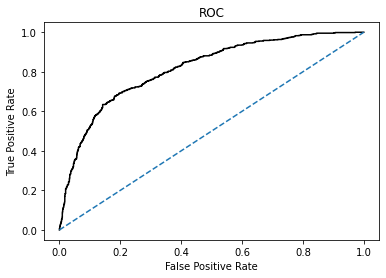

In [162]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid_nncl.predict_proba(x_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid_nncl.predict_proba(x_train)[:,1])
print('Area under Curve is', nn_train_auc)

### ANN Model Performance Evaluation on Test data

In [163]:
confusion_matrix(test_labels,ytest_predict_nncl)

array([[547,  58],
       [154, 141]], dtype=int64)

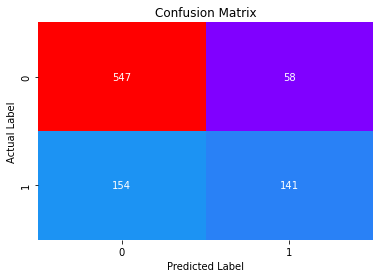

In [164]:
confusion_matrix(test_labels,ytest_predict_nncl)
sns.heatmap(confusion_matrix(test_labels,ytest_predict_nncl),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [165]:
nn_test_acc=best_grid_nncl.score(x_test,test_labels)
print('The score of ANN-test model is:',nn_test_acc)

The score of ANN-test model is: 0.7644444444444445


In [166]:
print(classification_report(test_labels,ytest_predict_nncl))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       605
           1       0.71      0.48      0.57       295

    accuracy                           0.76       900
   macro avg       0.74      0.69      0.70       900
weighted avg       0.76      0.76      0.75       900



In [167]:
nn_metrics=classification_report(test_labels, ytest_predict_nncl,output_dict=True)
ds1=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(ds1.loc["1"][0],2)
nn_test_recall=round(ds1.loc["1"][1],2)
nn_test_f1=round(ds1.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.71
nn_test_recall  0.48
nn_test_f1  0.57


Area under Curve is 0.7827903067656534


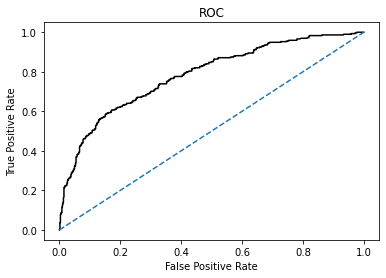

In [168]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid_nncl.predict_proba(x_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid_nncl.predict_proba(x_test)
[:,1])
print('Area under Curve is', nn_test_auc)

# 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

### Comparison of the performance metrics from the 3 models

In [169]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.77,0.82,0.77,0.79,0.76
AUC,0.83,0.79,0.87,0.82,0.82,0.78
Recall,0.59,0.49,0.61,0.47,0.58,0.48
Precision,0.67,0.71,0.74,0.73,0.67,0.71
F1 Score,0.63,0.58,0.67,0.58,0.62,0.57


### ROC Curve for the 3 models on the Training data

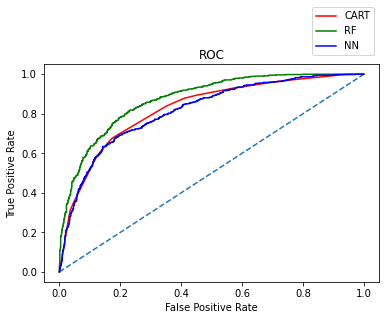

In [170]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr,cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='blue',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0.,1.02,1.,.102), loc='lower right')

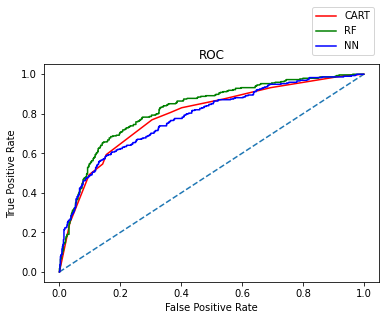

In [171]:
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(cart_test_fpr,cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='blue',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0.,1.02,1.,.102), loc='lower right')